In [134]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from gridworld import GridworldEnv

env = GridworldEnv()

In [135]:
# Greedy in the Limit with Infinite Exploration (GLIE)
def GLIE(env, discount_factor=1.0, episode_count=100):
    """
    Find optimal policy given an environment.

    Args:
        env: OpenAI env. In model free setup you have no access to env.P,
             transition dynamics of the environment.
             use step(a) to take an action and receive a tuple
             of (s', r, done, info)
             env.nS is number of states in the environment.
             env.nA is number of actions in the environment.
        episode_count: Number of episodes:
        discount_factor: Gamma discount factor.

    Returns:
        Vector of length env.nS representing the value function.
        policy:[S, A] shaped matrix representing the policy. Random in our case

    """
    # Start with (all 0) state value array and state-action matrix.
    # also initialize visit count to zero for the state-action visit count.
    V = np.zeros(env.nS)
    N = np.zeros((env.nS, env.nA))
    Q = np.zeros((env.nS, env.nA))
    # random policy
    policy = [np.random.randint(env.nA) for _ in range(env.nS)]
    k = 1
    eps = 1

    def argmax_a(arr):
        """
        Return idx of max element in an array.
        Break ties uniformly.
        """
        max_idx = []
        max_val = float("-inf")
        for idx, elem in enumerate(arr):
            if elem == max_val:
                max_idx.append(idx)
            elif elem > max_val:
                max_idx = [idx]
                max_val = elem
        return np.random.choice(max_idx)

    def get_action(state):
        if np.random.random() < eps:
            return np.random.choice(env.nA)
        else:
            return argmax_a(Q[state])

    # run multiple episodes
    while k <= episode_count:
        # collect samples for one episode
        episode_states = []
        episode_actions = []
        episode_returns = []
        state, _ = env.reset()
        episode_states.append(state)
        while True:
            action = get_action(state)
            episode_actions.append(action)
            (state, reward, done, _, _) = env.step(action)
            episode_returns.append(reward)
            if not done:
                episode_states.append(state)
            else:
                break

        # update state-action values
        G = 0
        count = len(episode_states)
        for t in range(count - 1, -1, -1):
            s, a, r = episode_states[t], episode_actions[t], episode_returns[t]
            G = discount_factor * G + r
            N[s, a] += 1
            Q[s, a] = Q[s, a] + 1 / N[s, a] * (G - Q[s, a])

        # Update policy and optimal value
        k = k + 1
        eps = 1 / k
        # uncomment "if" to have higher exploration initially and
        # then let epislon decay after 5000 episodes
        # if k <=100:
        #    eps = 0.02

        for s in range(env.nS):
            best_action = argmax_a(Q[s])
            policy[s] = best_action
            V[s] = Q[s, best_action]

    return np.array(V), np.array(policy)

In [136]:
# Custom print to show state values inside the grid
def grid_print(V):
    ax = sns.heatmap(
        V.reshape(env.shape),
        annot=True,
        square=True,
        cbar=False,
        cmap="Blues",
        xticklabels=False,
        yticklabels=False,
    )
    plt.show()

policy

 [['*' 'LEFT' 'LEFT' 'LEFT']
 ['UP' 'LEFT' 'RIGHT' 'DOWN']
 ['RIGHT' 'UP' 'LEFT' 'DOWN']
 ['UP' 'RIGHT' 'RIGHT' '*']]


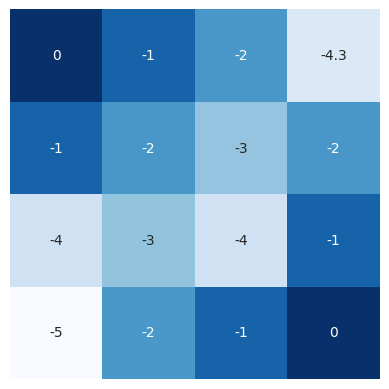

In [137]:
# run mc policy control GLIE
V_pi, policy = GLIE(env, discount_factor=1.0, episode_count=10000)

action_labels = {0:"UP", 1:"RIGHT", 2: "DOWN", 3:"LEFT"}
# print policy
optimal_actions = [action_labels[policy[s]] for s in range(env.nS)]
optimal_actions[0] = "*" 
optimal_actions[-1] = "*" 

print("policy\n\n",np.array(optimal_actions).reshape(env.shape))

# print state values
grid_print(V_pi.reshape(env.shape))